# **TUBES AI**

# **Topik: Prakiraan Kondisi Cuaca Menggunakan Fuzzy Mamdani dan Sugeno.**

# **1. Pendahuluan**


Perubahan cuaca yang tidak menentu dan sulit diprediksi menjadi tantangan besar dalam berbagai aspek kehidupan, termasuk pertanian, penerbangan, transportasi, dan mitigasi bencana alam. Informasi cuaca yang akurat dan tepat waktu sangat penting untuk mendukung pengambilan keputusan yang efektif. Namun, metode konvensional yang digunakan untuk memprediksi cuaca sering kali memiliki keterbatasan dalam menangani ketidakpastian dan variabilitas data.

Dalam beberapa tahun terakhir, sistem berbasis kecerdasan buatan telah menjadi alternatif yang menjanjikan untuk mengatasi keterbatasan tersebut. Salah satu metode yang populer adalah sistem fuzzy, yang mampu menangani data yang tidak pasti dan memiliki fleksibilitas dalam pemodelan masalah yang kompleks. Metode ini mampu meniru cara manusia berpikir dalam membuat keputusan berdasarkan informasi yang samar atau tidak pasti.




Tujuan dari penelitian:


1.   Mengembangkan sistem prediksi cuaca berbasis fuzzy logic menggunakan  
     metode Mamdani dan Sugeno.
2.   Membandingkan kinerja kedua metode dalam memprediksi kondisi cuaca dengan
     menggunakan parameter suhu udara, kelembapan, kecepatan angin, dan tekanan udara.
3.   Memberikan rekomendasi mengenai metode yang lebih efektif dalam
     menghasilkan prediksi cuaca yang akurat.



Pada penelitian kali ini kami menggunakan data set yang di ambil dari kaggle(https://www.kaggle.com/datasets/puanbeningpastika/data-dummy-prakiraan-cuaca/data) yang kemudian akan kami proses sesuai dengan ketentuan yang diberikan.


**Prose Pengembangan:**


1.   Pengumpulan dan pemrosesan data cuaca.

2.   Pembentukan fungsi keanggotaan untuk setiap variabel input dan output.

3.   Perancangan aturan fuzzy (fuzzy rules) yang merepresentasikan hubungan
     antara variabel input dan output.

4.   Evaluasi dan validasi model menggunakan data uji.



*   Variabel input penelitian:


    1.   Suhu Udara(°C) : Rendah, Normal, Tinggi.
    2.   Kelembapan Udara(%): lembab, Sedang, kering.
    3.   Kecepatan Angin(km/jam) : Lambat, Sedang, Cepat.
    4.   Tebal Awan (meter): tebal, sedang, tipis.
    5.   Tekanan Atmosfer (hPa): kuat, sedang, lemah


*   Variabel Output:


    1.   Perkiraan cuaca : Cerah, Berawan, Hujan.



    





*   Rules yang dibentuk:


    1.   Jika Suhu Udara Normal DAN Kelembapan Udara Sedang DAN Kecepatan Angin
         Sedang DAN Tebal Awan Tipis DAN Tekanan Atmosfer Kuat, Maka Perkiraan Cuaca Cerah.

    2.   Jika Suhu Udara Normal DAN Kelembapan Udara Lembab DAN Kecepatan Angin
         Lambat DAN Tebal Awan Sedang DAN Tekanan Atmosfer Sedang, Maka Perkiraan Cuaca Berawan.

    3.   Jika Suhu Udara Tinggi DAN Kelembapan Udara Kering DAN Kecepatan Angin
         Cepat DAN Tebal Awan Tipis DAN Tekanan Atmosfer Sedang, Maka Perkiraan Cuaca Cerah.

    4.   Jika Suhu Udara Rendah DAN Kelembapan Udara Lembab DAN Kecepatan
         Angin Lambat DAN Tebal Awan Tebal DAN Tekanan Atmosfer Lemah, Maka Perkiraan Cuaca Hujan.

    5.   Jika Suhu Udara Rendah DAN Kelembapan Udara Sedang DAN Kecepatan Angin
         Cepat DAN Tebal Awan Sedang DAN Tekanan Atmosfer Lemah, Maka Perkiraan Cuaca Berawan.

    6.   Jika Suhu Udara Tinggi DAN Kelembapan Udara Lembab DAN Kecepatan
         Angin Sedang DAN Tebal Awan Tebal DAN Tekanan Atmosfer Sedang, Maka Perkiraan Cuaca Hujan.


  



# **2. Metode dan Eksperimen**

Fuzzy system adalah suatu pendekatan dalam pengolahan informasi yang menggunakan logika fuzzy untuk menangani ketidakpastian dan ambiguitas dalam data. Berbeda dengan logika biner yang hanya mengenal dua nilai kebenaran (benar atau salah), logika fuzzy memungkinkan nilai kebenaran berada dalam rentang antara 0 dan 1, yang mencerminkan derajat keanggotaan suatu elemen dalam himpunan tertentu. Sistem ini sering digunakan dalam kecerdasan buatan untuk meniru cara berpikir manusia, dengan mengandalkan aturan berbentuk IF-THEN untuk membuat keputusan berdasarkan input yang diberikan.
Fuzzy system memiliki dua metode yaitu:


*   Mamdani
    Metode ini menggunakan pendekatan Max-Min untuk mengolah variabel input dan output yang dikelompokkan ke dalam himpunan fuzzy berdasarkan derajat keanggotaan. Proses dimulai dengan fuzzifikasi, di mana nilai input tegas dikonversi menjadi nilai fuzzy. Selanjutnya, fungsi implikasi diterapkan dengan menggunakan minimum untuk menentukan output dari setiap aturan fuzzy. Setelah itu, hasil dari semua aturan digabungkan menggunakan metode maksimum untuk mendapatkan output fuzzy akhir. Tahap terakhir adalah defuzzifikasi, di mana himpunan fuzzy diubah kembali menjadi nilai tegas menggunakan metode seperti centroid.
*   Sugeno
    Dalam metode ini, output dari setiap aturan ditentukan sebagai fungsi linear atau konstanta berdasarkan input yang diberikan. Proses dimulai dengan fuzzifikasi, di mana input tegas diubah menjadi nilai fuzzy. Kemudian, fungsi implikasi diterapkan untuk setiap aturan, menghasilkan output yang berupa fungsi linear atau nilai konstan. Hasil dari semua aturan kemudian digabungkan menggunakan rata-rata berbobot untuk menentukan hasil akhir.



# **3. Hasil dan Analisis**

# **a. Praprocesing Data**

In [6]:
!pip install -U scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.6 MB/s eta 0:00:00


In [7]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("/content/prakiraan_cuaca_dummy.csv")
df

,Suhu (Celsius),Kelembaban (%),Kecepatan Angin (km/jam),Tebal Awan (meter),Tekanan Atmosfer (hPa),Prakiraan Cuaca
0,21.0,98,1,995.0,1025,Hujan
1,34.0,51,25,259.0,957,Berawan
2,29.0,51,16,574.0,1047,Hujan
3,25.0,77,7,951.0,1099,Hujan
4,22.0,72,0,763.0,960,Cerah
...,...,...,...,...,...,...
144,35.0,77,15,293.0,1022,Hujan
145,20.0,79,25,616.0,949,Cerah
146,26.0,78,25,128.0,911,Cerah
147,26.0,95,15,264.0,1092,Hujan


In [ ]:
df.describe()

,Suhu (Celsius),Kelembaban (%),Kecepatan Angin (km/jam),Tebal Awan (meter),Tekanan Atmosfer (hPa)
count,144.000000,149.000000,149.000000,147.000000,149.000000
mean,24.694444,74.684564,16.422819,553.727891,1003.932886
std,5.990993,14.572784,8.971563,265.948099,60.363725
min,15.000000,50.000000,0.000000,108.000000,900.000000
25%,20.000000,65.000000,9.000000,304.500000,953.000000
50%,24.500000,76.000000,18.000000,556.000000,1012.000000
75%,29.000000,85.000000,25.000000,781.500000,1055.000000
max,35.000000,100.000000,30.000000,997.000000,1100.000000


In [ ]:
# Inisialisasi LabelEncoder
encoder = LabelEncoder()

# Mengencoding kolom dengan tipe objek
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

# Menampilkan hasil encoding
print("\nData Setelah Encoding:")
df


Data Setelah Encoding:


,Suhu (Celsius),Kelembaban (%),Kecepatan Angin (km/jam),Tebal Awan (meter),Tekanan Atmosfer (hPa),Prakiraan Cuaca
0,21.0,98,1,995.0,1025,2
1,34.0,51,25,259.0,957,0
2,29.0,51,16,574.0,1047,2
3,25.0,77,7,951.0,1099,2
4,22.0,72,0,763.0,960,1
...,...,...,...,...,...,...
144,35.0,77,15,293.0,1022,2
145,20.0,79,25,616.0,949,1
146,26.0,78,25,128.0,911,1
147,26.0,95,15,264.0,1092,2


In [ ]:
df.describe()

,Suhu (Celsius),Kelembaban (%),Kecepatan Angin (km/jam),Tebal Awan (meter),Tekanan Atmosfer (hPa),Prakiraan Cuaca
count,144.000000,149.000000,149.000000,147.000000,149.000000,149.000000
mean,24.694444,74.684564,16.422819,553.727891,1003.932886,0.973154
std,5.990993,14.572784,8.971563,265.948099,60.363725,0.787970
min,15.000000,50.000000,0.000000,108.000000,900.000000,0.000000
25%,20.000000,65.000000,9.000000,304.500000,953.000000,0.000000
50%,24.500000,76.000000,18.000000,556.000000,1012.000000,1.000000
75%,29.000000,85.000000,25.000000,781.500000,1055.000000,2.000000
max,35.000000,100.000000,30.000000,997.000000,1100.000000,2.000000


variabe input:

# **FUNGSI KEANGGOTAAN**

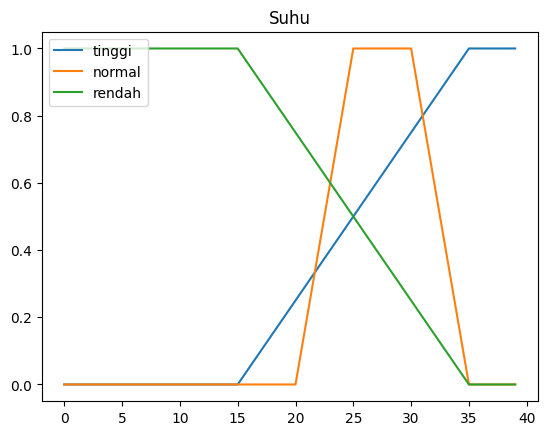

In [ ]:
#Keanggotaan SUHU
suhu = np.arange(0,40,1)
tinggi = fuzz.trapmf(suhu, [15, 35, 40, 40])
normal = fuzz.trapmf(suhu, [20, 25, 30, 35])
rendah = fuzz.trapmf(suhu, [0, 0, 15, 35])

plt.title("Suhu")
plt.plot(suhu, tinggi, label="tinggi")
plt.plot(suhu, normal, label="normal")
plt.plot(suhu, rendah, label="rendah")

plt.legend(loc="upper left")

In [ ]:
# Input:suhu
input_suhu = 30

suhu_rendah = fuzz.interp_membership(suhu,rendah,input_suhu)
suhu_normal = fuzz.interp_membership(suhu,normal,input_suhu)
suhu_tinggi = fuzz.interp_membership(suhu,tinggi,input_suhu)

print(f'derajat keanggotaan himpuna rendah : {suhu_rendah},\nderajat keanggotaan himpunan normal: {suhu_normal},\nderajat keanggotaan himpunan tinggi: {suhu_tinggi}')

derajat keanggotaan himpuna rendah : 0.25,
derajat keanggotaan himpunan normal: 1.0,
derajat keanggotaan himpunan tinggi: 0.75


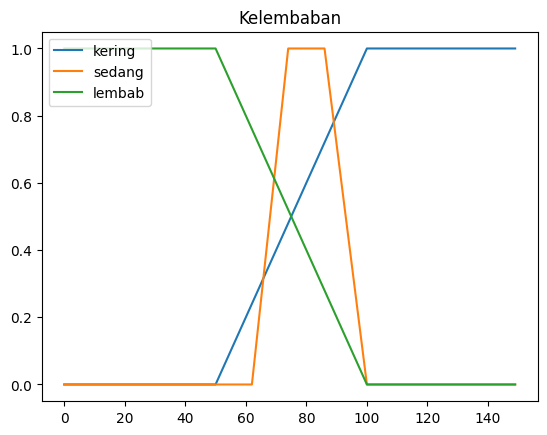

In [ ]:
#Keanggotaan KELEMBABAN
kelembapan = np.arange(0,150,1)
kering = fuzz.trapmf(kelembapan, [50, 100, 150, 150])
sedang = fuzz.trapmf(kelembapan, [62, 74, 86, 100])
lembab = fuzz.trapmf(kelembapan, [0, 0, 50, 100])

plt.title("Kelembaban")
plt.plot(kelembapan, kering, label="kering")
plt.plot(kelembapan, sedang, label="sedang")
plt.plot(kelembapan, lembab, label="lembab")

plt.legend(loc="upper left")

In [ ]:
# Input:kelembapan
input_kelembapan = 85

kelembapan_kering = fuzz.interp_membership(kelembapan, kering,input_kelembapan )
kelembapan_sedang = fuzz.interp_membership(kelembapan, sedang,input_kelembapan )
kelembapan_lembab = fuzz.interp_membership(kelembapan, lembab,input_kelembapan )

print(f'derajat keanggotaan himpunan kering : {kelembapan_kering},\nderajat keanggotaan himpunan sedang: {kelembapan_sedang},\nderajat keanggotaan himpunan lembab: {kelembapan_lembab}')

derajat keanggotaan himpunan kering : 0.7,
derajat keanggotaan himpunan sedang: 1.0,
derajat keanggotaan himpunan lembab: 0.3


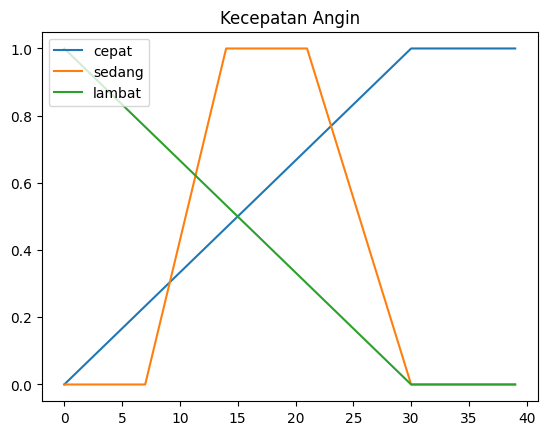

In [ ]:
#Keanggotaan KECEPATAN ANGIN
angin = np.arange(0,40,1)
cepat = fuzz.trapmf(angin, [0, 30, 40, 40])
sedang = fuzz.trapmf(angin, [7, 14, 21, 30])
lambat = fuzz.trapmf(angin, [0, 0, 0, 30])

plt.title("Kecepatan Angin")
plt.plot(angin, cepat, label="cepat")
plt.plot(angin, sedang, label="sedang")
plt.plot(angin, lambat, label="lambat")

plt.legend(loc="upper left")

In [ ]:
# Input:kecepatan angin
input_kecepatan_angin = 25

angin_lambat = fuzz.interp_membership(angin,lambat,input_kecepatan_angin )
angin_sedang = fuzz.interp_membership(angin,sedang,input_kecepatan_angin)
angin_cepat = fuzz.interp_membership(angin,cepat,input_kecepatan_angin)

print(f'derajat keanggotaan himpunan lambat : {angin_lambat},\nderajat keanggotaan himpunan sedang: {angin_sedang},\nderajat keanggotaan himpunan cepat: {angin_cepat}')

derajat keanggotaan himpunan lambat : 0.16666666666666666,
derajat keanggotaan himpunan sedang: 0.5555555555555556,
derajat keanggotaan himpunan cepat: 0.8333333333333334


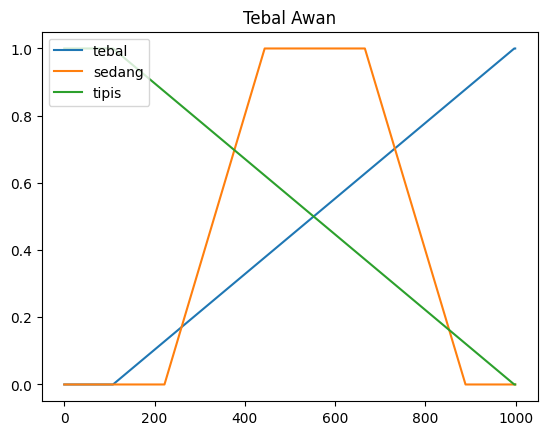

In [ ]:
#Keanggotaan TEBAL AWAN
awan = np.arange(0,1000,1)
tebal = fuzz.trapmf(awan, [108, 997, 1000, 1000])
sedang = fuzz.trapmf(awan, [222, 444, 666, 889])
tipis = fuzz.trapmf(awan, [0, 0, 108, 997])

plt.title("Tebal Awan")
plt.plot(awan, tebal, label="tebal")
plt.plot(awan, sedang, label="sedang")
plt.plot(awan, tipis, label="tipis")

plt.legend(loc="upper left")

In [ ]:
# Input: sensor tebal awan
input_awan = 400

awan_tebal = fuzz.interp_membership(awan, tebal, input_awan)
awan_sedang = fuzz.interp_membership(awan, sedang, input_awan)
awan_tipis = fuzz.interp_membership(awan, tipis, input_awan)

print(f'derajat keanggotaan himpunan tebal : {awan_tebal},\nderajat keanggotaan himpunan sedang : {awan_sedang},\nderajat keanggotaan himpunan tipis : {awan_tipis}')

derajat keanggotaan himpunan tebal : 0.32845894263217096,
derajat keanggotaan himpunan sedang : 0.8018018018018018,
derajat keanggotaan himpunan tipis : 0.671541057367829


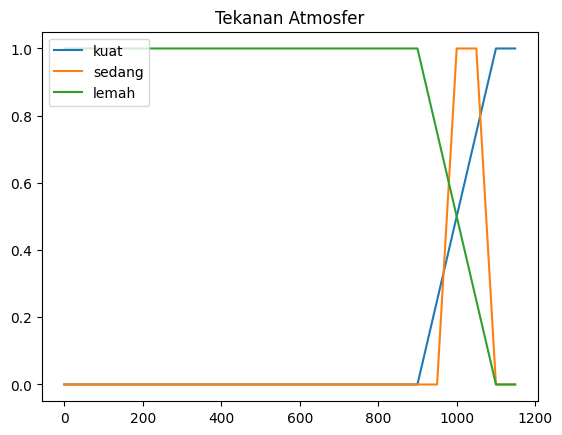

In [ ]:
#Keanggotaan TEKANAN ATMOSFER
atmosfer = np.arange(0,1150,1)
kuat = fuzz.trapmf(atmosfer, [900, 1100, 1150, 1150])
sedang = fuzz.trapmf(atmosfer, [950, 1000, 1050, 1100])
lemah = fuzz.trapmf(atmosfer, [0, 0, 900, 1100])

plt.title("Tekanan Atmosfer")
plt.plot(atmosfer, kuat, label="kuat")
plt.plot(atmosfer, sedang, label="sedang")
plt.plot(atmosfer, lemah, label="lemah")

plt.legend(loc="upper left")

In [ ]:
# Input: sensor tekanan atmosfer
input_atmosfer = 1000

atmosfer_kuat = fuzz.interp_membership(atmosfer, kuat, input_atmosfer)
atmosfer_sedang = fuzz.interp_membership(atmosfer, sedang, input_atmosfer)
atmosfer_lemah = fuzz.interp_membership(atmosfer, lemah, input_atmosfer)

print(f'derajat keanggotaan himpunan kuat : {atmosfer_kuat},\nderajat keanggotaan himpunan sedang : {atmosfer_sedang},\nderajat keanggotaan himpunan lemah: {atmosfer_lemah}')

derajat keanggotaan himpunan kuat : 0.5,
derajat keanggotaan himpunan sedang : 1.0,
derajat keanggotaan himpunan lemah: 0.5


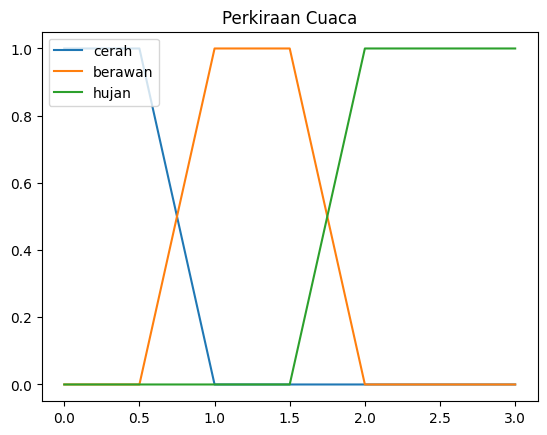

In [ ]:
#Keanggotaan PERKIRAAN CUACA
cuaca = np.arange(0, 3.1, 0.1)
cerah = fuzz.trapmf(cuaca, [0, 0, 0.5, 1])
berawan = fuzz.trapmf(cuaca, [0.5, 1, 1.5, 2])
hujan = fuzz.trapmf(cuaca, [1.5, 2, 3, 3])

plt.title("Perkiraan Cuaca")
plt.plot(cuaca, cerah, label="cerah")
plt.plot(cuaca, berawan, label="berawan")
plt.plot(cuaca, hujan, label="hujan")

plt.legend(loc="upper left")

# **RULES INFERENSI**

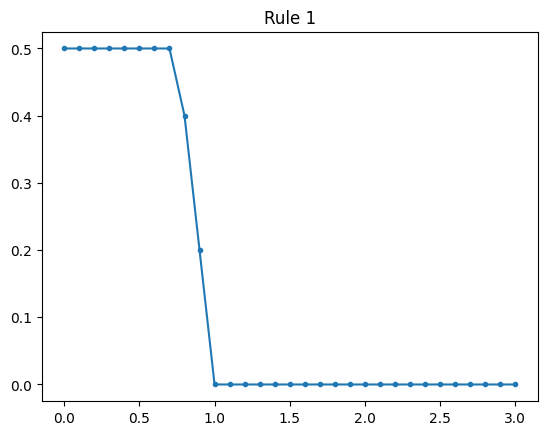

In [ ]:
#R1
alpha_predikat1=np.min([suhu_normal,kelembapan_sedang, angin_sedang, awan_tipis, atmosfer_kuat], axis=0)
mf_rule1 = np.fmin(alpha_predikat1, cerah)

plt.title("Rule 1")
plt.plot(cuaca, mf_rule1, label="Rule1", marker=".")

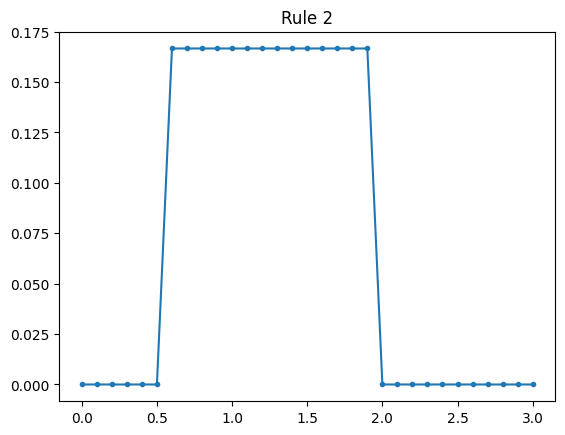

In [ ]:
#R2
alpha_predikat2=np.min([suhu_normal,kelembapan_lembab, angin_lambat, awan_sedang, atmosfer_sedang], axis=0)
mf_rule2 = np.fmin(alpha_predikat2, berawan)

plt.title("Rule 2")
plt.plot(cuaca, mf_rule2, label="Rule2", marker=".")

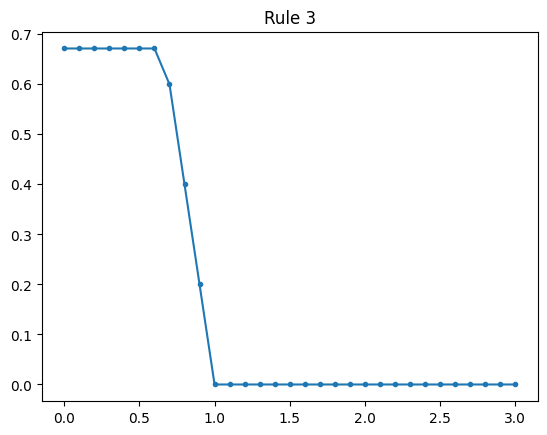

In [ ]:
#R3
alpha_predikat3=np.min([suhu_tinggi,kelembapan_kering, angin_cepat, awan_tipis, atmosfer_sedang], axis=0)
mf_rule3 = np.fmin(alpha_predikat3, cerah)

plt.title("Rule 3")
plt.plot(cuaca, mf_rule3, label="Rule3", marker=".")

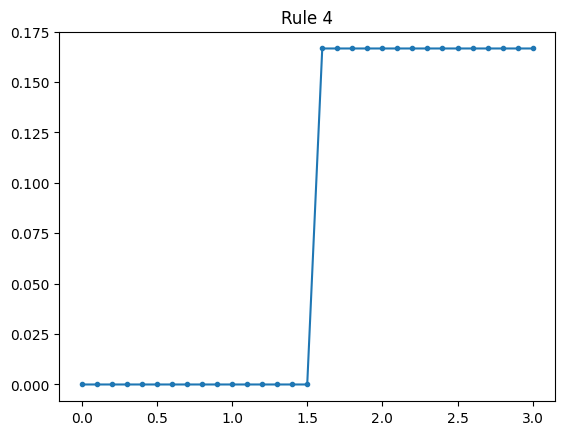

In [ ]:
#R4
alpha_predikat4=np.min([suhu_rendah,kelembapan_lembab, angin_lambat, awan_tebal, atmosfer_lemah], axis=0)
mf_rule4 = np.fmin(alpha_predikat4, hujan)

plt.title("Rule 4")
plt.plot(cuaca, mf_rule4, label="Rule4", marker=".")

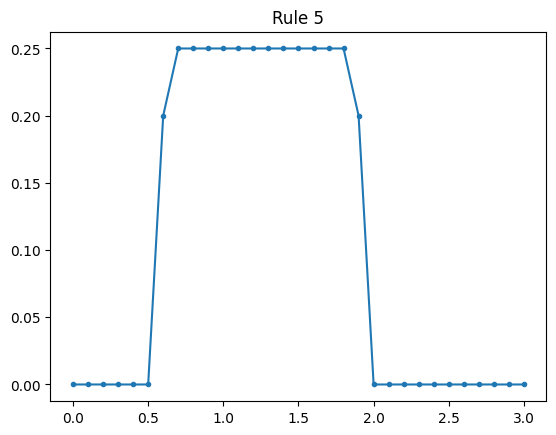

In [ ]:
#R5
alpha_predikat5=np.min([suhu_rendah,kelembapan_sedang, angin_cepat, awan_sedang, atmosfer_lemah], axis=0)
mf_rule5 = np.fmin(alpha_predikat5, berawan)

plt.title("Rule 5")
plt.plot(cuaca, mf_rule5, label="Rule5", marker=".")

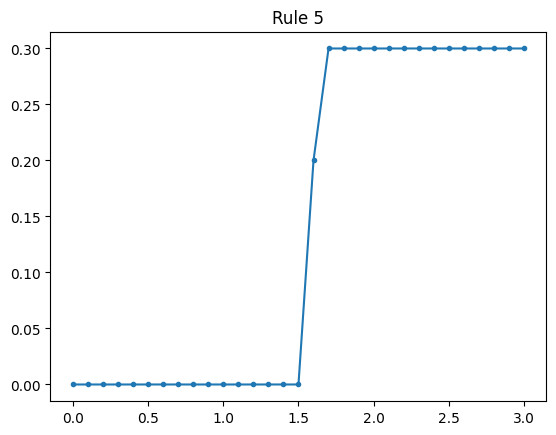

In [ ]:
#R6
alpha_predikat6=np.min([suhu_tinggi,kelembapan_lembab, angin_sedang, awan_tebal, atmosfer_sedang], axis=0)
mf_rule6 = np.fmin(alpha_predikat6, hujan)

plt.title("Rule 5")
plt.plot(cuaca, mf_rule6, label="Rule6", marker=".")

# **METODE MAMDANI**

**KOMBINASI RULES**

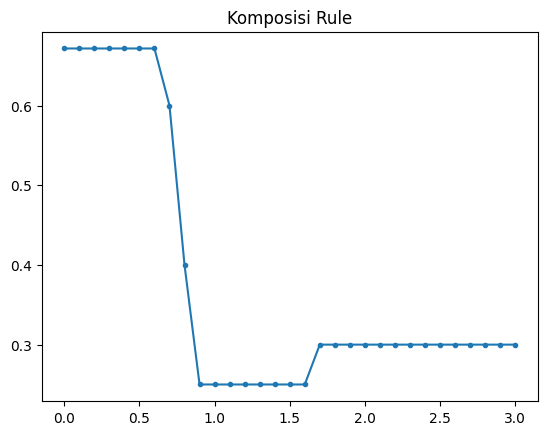

In [ ]:
# Apply the rules:
# * max for aggregation, like or the cases
aggregated = np.fmax(mf_rule1,np.fmax(mf_rule2, np.fmax(mf_rule3, np.fmax(mf_rule4, np.fmax(mf_rule5,mf_rule6)))))

plt.title("Komposisi Rule")
plt.plot(cuaca, aggregated, label="fuzzy result", marker=".")

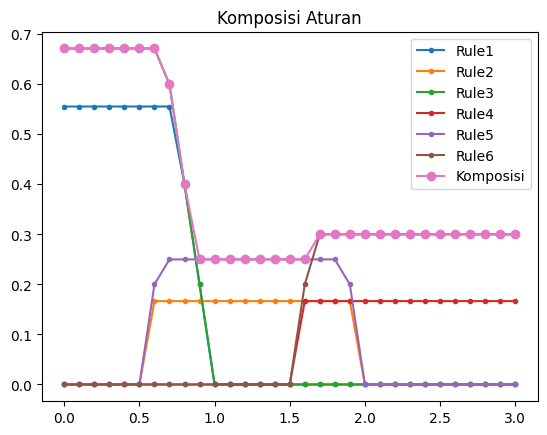

In [ ]:
plt.title('Komposisi Aturan')
plt.plot(cuaca, mf_rule1, label="Rule1", marker=".")
plt.plot(cuaca, mf_rule2, label="Rule2", marker=".")
plt.plot(cuaca, mf_rule3, label="Rule3", marker=".")
plt.plot(cuaca, mf_rule4, label="Rule4", marker=".")
plt.plot(cuaca, mf_rule5, label="Rule5", marker=".")
plt.plot(cuaca, mf_rule6, label="Rule6", marker=".")
plt.plot(cuaca, aggregated, label="Komposisi", marker="o")
plt.legend(loc='upper right')

In [ ]:
# Defuzzification
cuaca_centroid = fuzz.defuzz(cuaca, aggregated, 'centroid')
print("Cuaca dengan metode Centroid: ", cuaca_centroid)
cuaca_bisector = fuzz.defuzz(cuaca, aggregated, 'bisector')
print("Cuaca dengan metode Bisector: ", cuaca_bisector)

Cuaca dengan metode Centroid:  1.233150045082997
Cuaca dengan metode Bisector:  0.9869966254218224


In [ ]:
# Defuzzification
cuaca_centroid = fuzz.defuzz(cuaca, aggregated, 'centroid')
cuaca_bisector = fuzz.defuzz(cuaca, aggregated, 'bisector')
cuaca_mom = fuzz.defuzz(cuaca, aggregated, "mom")
cuaca_som = fuzz.defuzz(cuaca, aggregated, "som")
cuaca_lom = fuzz.defuzz(cuaca, aggregated, "lom")

print(f'perkiraan cuaca (Centroid) : {cuaca_centroid},\nperkiraan cuaca (bisector) : {cuaca_bisector},\nperkiraan cuaca(MoM) : {cuaca_mom},\nperkiraan cuaca(LoM) : {cuaca_lom},\nperkiraan cuaca(SoM) : {cuaca_som}')

perkiraan cuaca (Centroid) : 1.233150045082997,
perkiraan cuaca (bisector) : 0.9869966254218224,
perkiraan cuaca(MoM) : 0.3,
perkiraan cuaca(LoM) : 0.6000000000000001,
perkiraan cuaca(SoM) : 0.0


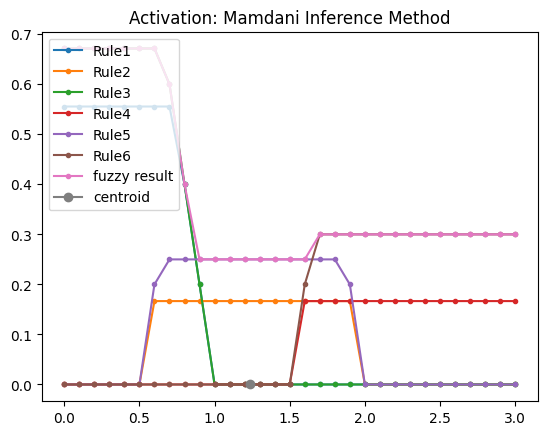

In [ ]:
plt.title("Activation: Mamdani Inference Method")

plt.plot(cuaca, mf_rule1, label="Rule1", marker=".")
plt.plot(cuaca, mf_rule2, label="Rule2", marker=".")
plt.plot(cuaca, mf_rule3, label="Rule3", marker=".")
plt.plot(cuaca, mf_rule4, label="Rule4", marker=".")
plt.plot(cuaca, mf_rule5, label="Rule5", marker=".")
plt.plot(cuaca, mf_rule6, label="Rule6", marker=".")
plt.plot(cuaca, aggregated, label="fuzzy result", marker=".")
plt.plot(cuaca_centroid, 0.0, label="centroid", marker="o")
plt.legend(loc="upper left")

# **METODE SUGENO**

In [ ]:
z1 = 0.5 * input_kecepatan_angin + 1700
z2 = 2 * input_kecepatan_angin - 4000
z3 = 0.5 * input_kecepatan_angin + 2000
z4 = input_kecepatan_angin + 700
z5 = 0.5 * input_kecepatan_angin + 1500
z6 = 0.3 * input_kecepatan_angin + 2500

# Menghitung output akhir menggunakan metode Sugeno
z = (alpha_predikat1 * z1 + alpha_predikat2 * z2 + alpha_predikat3 * z3 +
     alpha_predikat4 * z4 + alpha_predikat5 * z5 + alpha_predikat6 * z6) / \
    (alpha_predikat1 + alpha_predikat2 + alpha_predikat3 +
     alpha_predikat4 + alpha_predikat5 + alpha_predikat6)

# Pastikan tidak ada pembagian dengan nol
if (alpha_predikat1 + alpha_predikat2 + alpha_predikat3 +
    alpha_predikat4 + alpha_predikat5 + alpha_predikat6) == 0:
    z = 0

print("Perkiraan Cuaca (Output Sugeno):", z)

Perkiraan Cuaca (Output Sugeno): 1372.1091628641059


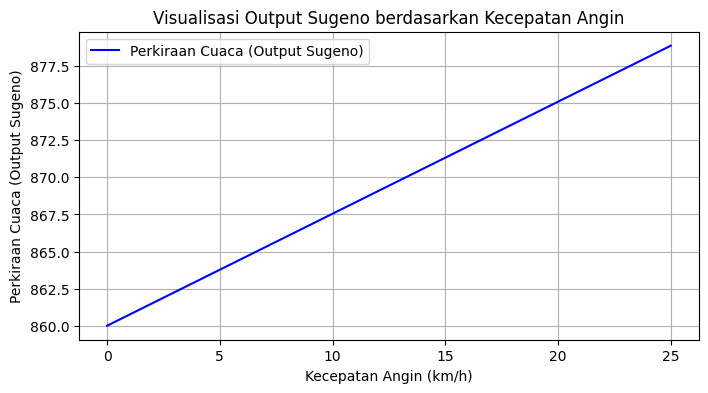

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk menghitung output Sugeno
def hitung_output_sugeno(input_kecepatan_angin, alpha_predikat1, alpha_predikat2, alpha_predikat3, alpha_predikat4, alpha_predikat5, alpha_predikat6):
    z1 = 0.5 * input_kecepatan_angin + 1700
    z2 = 2 * input_kecepatan_angin - 4000
    z3 = 0.5 * input_kecepatan_angin + 2000
    z4 = input_kecepatan_angin + 700
    z5 = 0.5 * input_kecepatan_angin + 1500
    z6 = 0.3 * input_kecepatan_angin + 2500

    z = (alpha_predikat1 * z1 + alpha_predikat2 * z2 + alpha_predikat3 * z3 +
         alpha_predikat4 * z4 + alpha_predikat5 * z5 + alpha_predikat6 * z6) / \
        (alpha_predikat1 + alpha_predikat2 + alpha_predikat3 +
         alpha_predikat4 + alpha_predikat5 + alpha_predikat6)

    # Pastikan tidak ada pembagian dengan nol
    if (alpha_predikat1 + alpha_predikat2 + alpha_predikat3 +
        alpha_predikat4 + alpha_predikat5 + alpha_predikat6) == 0:
        z = 0
    return z

# Menyiapkan data input kecepatan angin (misalnya dari 0 hingga 100 km/h)
input_kecepatan_angin = np.linspace(0, 25, 25)

# Nilai alpha untuk setiap predikat (asumsi nilai acak atau berdasarkan kondisi tertentu)
alpha_predikat1 = 0.2
alpha_predikat2 = 0.15
alpha_predikat3 = 0.25
alpha_predikat4 = 0.1
alpha_predikat5 = 0.2
alpha_predikat6 = 0.1

# Menghitung output untuk setiap input_kecepatan_angin
output_sugeno = [hitung_output_sugeno(kecepatan, alpha_predikat1, alpha_predikat2, alpha_predikat3,
                                      alpha_predikat4, alpha_predikat5, alpha_predikat6)
                 for kecepatan in input_kecepatan_angin]

# Visualisasi hasil
plt.figure(figsize=(8, 4))
plt.plot(input_kecepatan_angin, output_sugeno, label='Perkiraan Cuaca (Output Sugeno)', color='b')
plt.title('Visualisasi Output Sugeno berdasarkan Kecepatan Angin')
plt.xlabel('Kecepatan Angin (km/h)')
plt.ylabel('Perkiraan Cuaca (Output Sugeno)')
plt.grid(True)
plt.legend()
plt.show()
